In [53]:
#IMPORTING THE LIBRARIES

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import norm
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import KFold,cross_val_score


In [54]:
#LOADING THE DATASET

df = pd.read_csv("C:\\Users\\Ritika Kumari\\Downloads\\archive (11)\\Heart Attack.csv")
df.shape

(1319, 9)

In [55]:
#CHECKING THE TOP VALUES OF THE DATAFRAME

df.head()

,age,gender,impluse,pressurehight,pressurelow,glucose,kcm,troponin,class
0,64,1,66,160,83,160.0,1.80,0.012,negative
1,21,1,94,98,46,296.0,6.75,1.060,positive
2,55,1,64,160,77,270.0,1.99,0.003,negative
3,64,1,70,120,55,270.0,13.87,0.122,positive
4,55,1,64,112,65,300.0,1.08,0.003,negative


In [56]:
#DISPLAYING ALL COLUMNS AND ROWS

pd.set_option("display.max_columns",None)
pd.set_option("display.max_rows",None)

In [57]:
#GETTING THE DISCRIPTION OF THE DATAFRAME

df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,1319.0,56.191812,13.647315,14.000,47.000,58.000,65.0000,103.0
gender,1319.0,0.659591,0.474027,0.000,0.000,1.000,1.0000,1.0
impluse,1319.0,78.336619,51.630270,20.000,64.000,74.000,85.0000,1111.0
pressurehight,1319.0,127.170584,26.122720,42.000,110.000,124.000,143.0000,223.0
pressurelow,1319.0,72.269143,14.033924,38.000,62.000,72.000,81.0000,154.0
glucose,1319.0,146.634344,74.923045,35.000,98.000,116.000,169.5000,541.0
kcm,1319.0,15.274306,46.327083,0.321,1.655,2.850,5.8050,300.0
troponin,1319.0,0.360942,1.154568,0.001,0.006,0.014,0.0855,10.3


In [58]:
#CHECKING THE DATASET

df.head(10)

,age,gender,impluse,pressurehight,pressurelow,glucose,kcm,troponin,class
0,64,1,66,160,83,160.0,1.80,0.012,negative
1,21,1,94,98,46,296.0,6.75,1.060,positive
2,55,1,64,160,77,270.0,1.99,0.003,negative
3,64,1,70,120,55,270.0,13.87,0.122,positive
4,55,1,64,112,65,300.0,1.08,0.003,negative
5,58,0,61,112,58,87.0,1.83,0.004,negative
6,32,0,40,179,68,102.0,0.71,0.003,negative
7,63,1,60,214,82,87.0,300.00,2.370,positive
8,44,0,60,154,81,135.0,2.35,0.004,negative
9,67,1,61,160,95,100.0,2.84,0.011,negative


In [59]:
#GETTING THE INFO. OF THE DATASET

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1319 entries, 0 to 1318
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   age            1319 non-null   int64  
 1   gender         1319 non-null   int64  
 2   impluse        1319 non-null   int64  
 3   pressurehight  1319 non-null   int64  
 4   pressurelow    1319 non-null   int64  
 5   glucose        1319 non-null   float64
 6   kcm            1319 non-null   float64
 7   troponin       1319 non-null   float64
 8   class          1319 non-null   object 
dtypes: float64(3), int64(5), object(1)
memory usage: 92.9+ KB


In [60]:
#CHECKING THE NULL VALUES IN ALL THE COLUMNS

df.isnull().sum()

age              0
gender           0
impluse          0
pressurehight    0
pressurelow      0
glucose          0
kcm              0
troponin         0
class            0
dtype: int64

In [61]:
#FINDING THE SUM OF OVERALL NULL VALUES

df.isnull().sum().sum()

0

<AxesSubplot:>

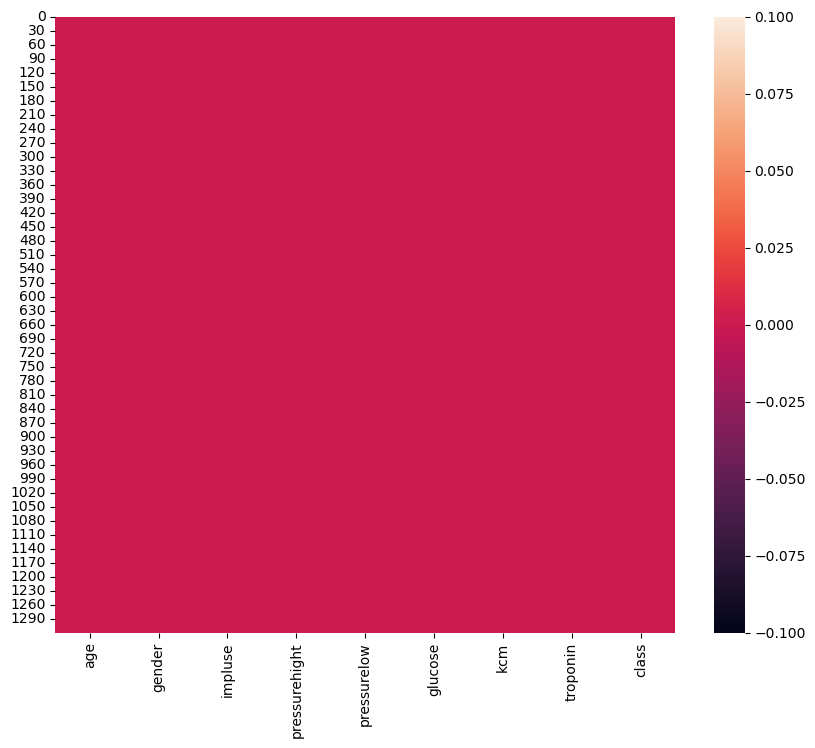

In [62]:
#VISUALISING THE DATAFRAME
#USING HEATMAP

plt.figure(figsize=(10,8))
sns.heatmap(df.isnull())

THERE ARE NO NULL VALUES IN THE DATAFRAME

# HANDLING OUTLIERS

In [63]:
#GETTING ALL THE NUMERICAL FEATURE

num_var = df.select_dtypes(include=['int64','float64']).keys()
num_var

Index(['age', 'gender', 'impluse', 'pressurehight', 'pressurelow', 'glucose',
       'kcm', 'troponin'],
      dtype='object')

C:\Users\Ritika Kumari\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Ritika Kumari\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Ritika Kumari\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\User

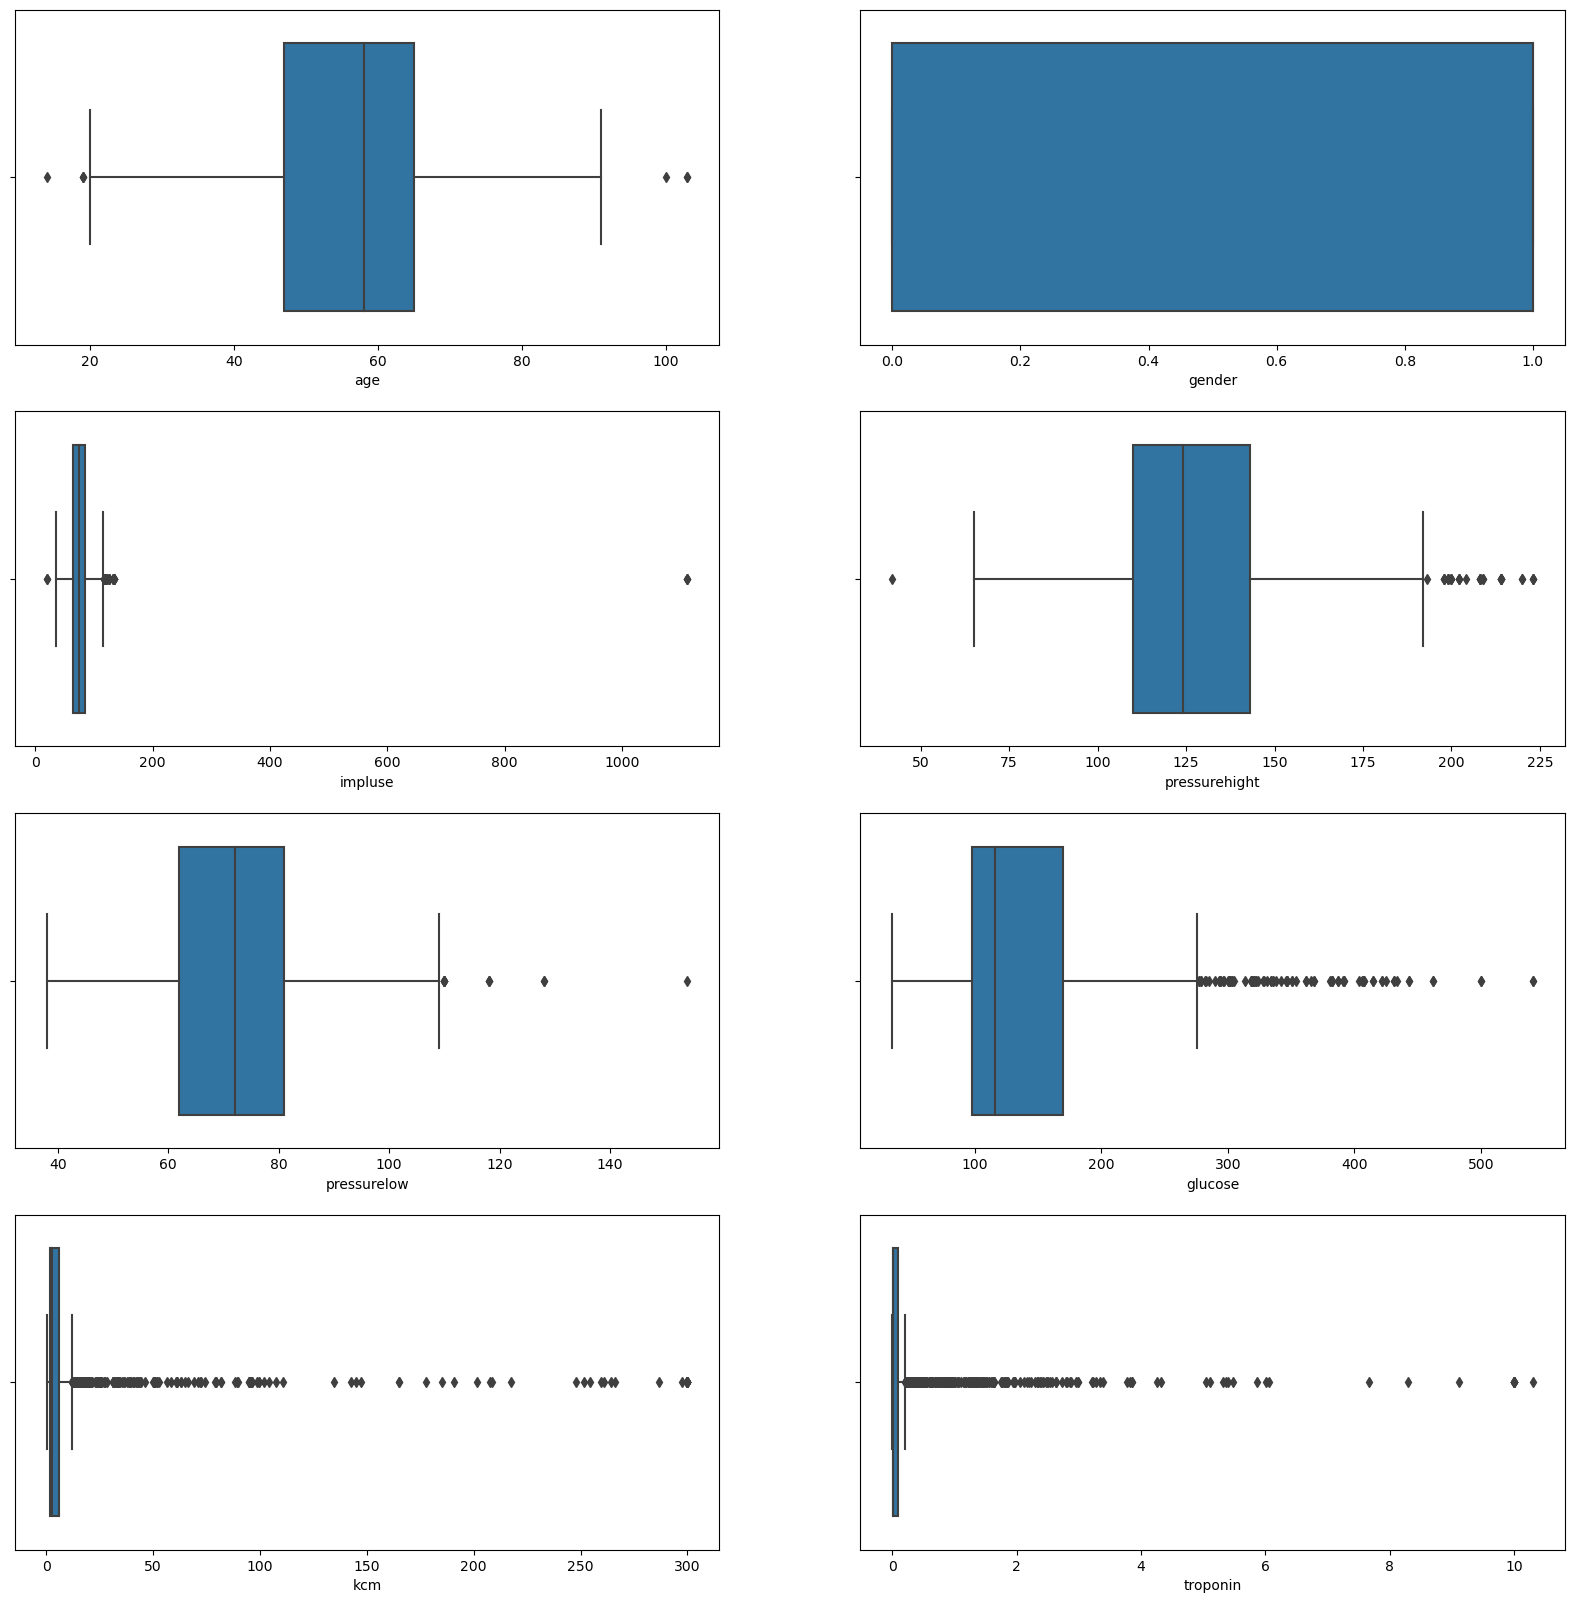

In [64]:
#PLOTTING BOXPLOT TO CHECK OUTLIERS IN THE DATAFRAME

num_var = ['age', 'gender', 'impluse', 'pressurehight', 'pressurelow', 'glucose',
       'kcm', 'troponin']


plt.figure(figsize=(20,20))
for i , var in enumerate(num_var):
    plt.subplot(4,2,i+1)
    sns.boxplot(df[var])
    plt.show

In [65]:
#LISTING THE FEAURES HAVING OUTLIERS

out_lier = ['age','impluse','pressurehight','pressurelow','glucose','kcm','troponin']

# IQR METHOD TO HANDLE OUTLIERS

In [66]:
#SORTING THE DATAFRAME


df['age'] = sorted(df['age'])
df['impluse'] = sorted(df['impluse'])
df['pressurehight'] = sorted(df['pressurehight'])
df['pressurelow'] = sorted(df['pressurelow'])
df['glucose'] = sorted(df['glucose'])
df['kcm'] = sorted(df['kcm'])
df['troponin'] = sorted(df['troponin'])


In [67]:
#CALCULATING 1ST , 3RD QUANTILE AND INTERQUANTILE RANGE AND

out_lier = ['age','impluse','pressurehight','pressurelow','glucose','kcm','troponin']

for i, var in enumerate(out_lier):
    q1 = df[var].quantile(0.25)
    q3 = df[var].quantile(0.75)
    iqr = q3 - q1
   
    print("--------------------------------------------------")
    print("25th percentile(q1) value of feature ", var,":" ,q1 )
    print("75th percentile(q3) value of feature ", var,":" ,q3 )
    print("IQR of feature ", var,":" ,iqr )
    print("--------------------------------------------------") 


--------------------------------------------------
25th percentile(q1) value of feature  age : 47.0
75th percentile(q3) value of feature  age : 65.0
IQR of feature  age : 18.0
--------------------------------------------------
--------------------------------------------------
25th percentile(q1) value of feature  impluse : 64.0
75th percentile(q3) value of feature  impluse : 85.0
IQR of feature  impluse : 21.0
--------------------------------------------------
--------------------------------------------------
25th percentile(q1) value of feature  pressurehight : 110.0
75th percentile(q3) value of feature  pressurehight : 143.0
IQR of feature  pressurehight : 33.0
--------------------------------------------------
--------------------------------------------------
25th percentile(q1) value of feature  pressurelow : 62.0
75th percentile(q3) value of feature  pressurelow : 81.0
IQR of feature  pressurelow : 19.0
--------------------------------------------------
------------------------

In [68]:
#CALCULATING UPPER AND LOWER LIMITS 

out_lier = ['age','impluse','pressurehight','pressurelow','glucose','kcm','troponin']

def limits(feature,q1,q3,iqr):
    upper_limit = q3 + (1.5 * iqr)
    lower_limit = q1 - (1.5 * iqr)
    print("upper limit ( ", feature, " )" , " : ", upper_limit)
    print("lower limit ( ", feature, " )" , " : ", lower_limit)
    print("--------------------------------------------------------")
    print("--------------------------------------------------------")
    

limits("age",  47.0,65.0, 18.0)
limits("impluse", 64.0, 85.0,21.0)
limits("pressurehight", 110.0, 143.0, 33.0)
limits("pressurelow" ,62.0, 81.0, 19.0 )
limits("glucose",  98.0,169.5,71.5)
limits("kcm",1.6549999999999998,5.805,4.15)
limits("troponin",  0.006,0.08549999999999999,0.07949999999999999)




upper limit (  age  )  :  92.0
lower limit (  age  )  :  20.0
--------------------------------------------------------
--------------------------------------------------------
upper limit (  impluse  )  :  116.5
lower limit (  impluse  )  :  32.5
--------------------------------------------------------
--------------------------------------------------------
upper limit (  pressurehight  )  :  192.5
lower limit (  pressurehight  )  :  60.5
--------------------------------------------------------
--------------------------------------------------------
upper limit (  pressurelow  )  :  109.5
lower limit (  pressurelow  )  :  33.5
--------------------------------------------------------
--------------------------------------------------------
upper limit (  glucose  )  :  276.75
lower limit (  glucose  )  :  -9.25
--------------------------------------------------------
--------------------------------------------------------
upper limit (  kcm  )  :  12.030000000000001
lower limit (  kc

TRIMMING

In [69]:
#CREATING A NEW DATAFRAME HAVING THE VALUES OF THE ROWS WITHIN THE CALCULATED LIMITS.

df1 =df.loc[(df['age'] <=  92.0) & (df['age'] >= 20.0)]
df1 =df1.loc[(df1['impluse'] <= 116.5 ) & (df1['impluse'] >= 32.5)]
df1 =df1.loc[(df1['pressurehight'] <= 192.5) & (df1['pressurehight'] >= 60.5)]
df1 =df1.loc[(df1['pressurelow'] <= 109.5) & (df1['pressurelow'] >= 33.5)]
df1 =df1.loc[(df1['glucose'] <= 276.75) & (df1['glucose'] >= -9.25)]
df1 =df1.loc[(df1['kcm'] <= 12.030000000000001) & (df1['kcm'] >= -4.57)]
df1 =df1.loc[(df['troponin'] <=   0.20475) & (df1['troponin'] >=  -0.11324999999999998)]

In [70]:
#CHECKING THE LENGTH OF THE ORIGIONAL AND THE NEW DATAFRAME
len(df) , len(df1)

(1319, 1058)

In [71]:
#GETTING THE NUMBER OF ROWS HAVING OUTLIERS
len(df) - len(df1)

261

In [72]:
#FINDING THE PERCENTAGE 
(len(df)-len(df1))/1319*100

19.787717968157693

C:\Users\Ritika Kumari\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Ritika Kumari\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Ritika Kumari\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\User

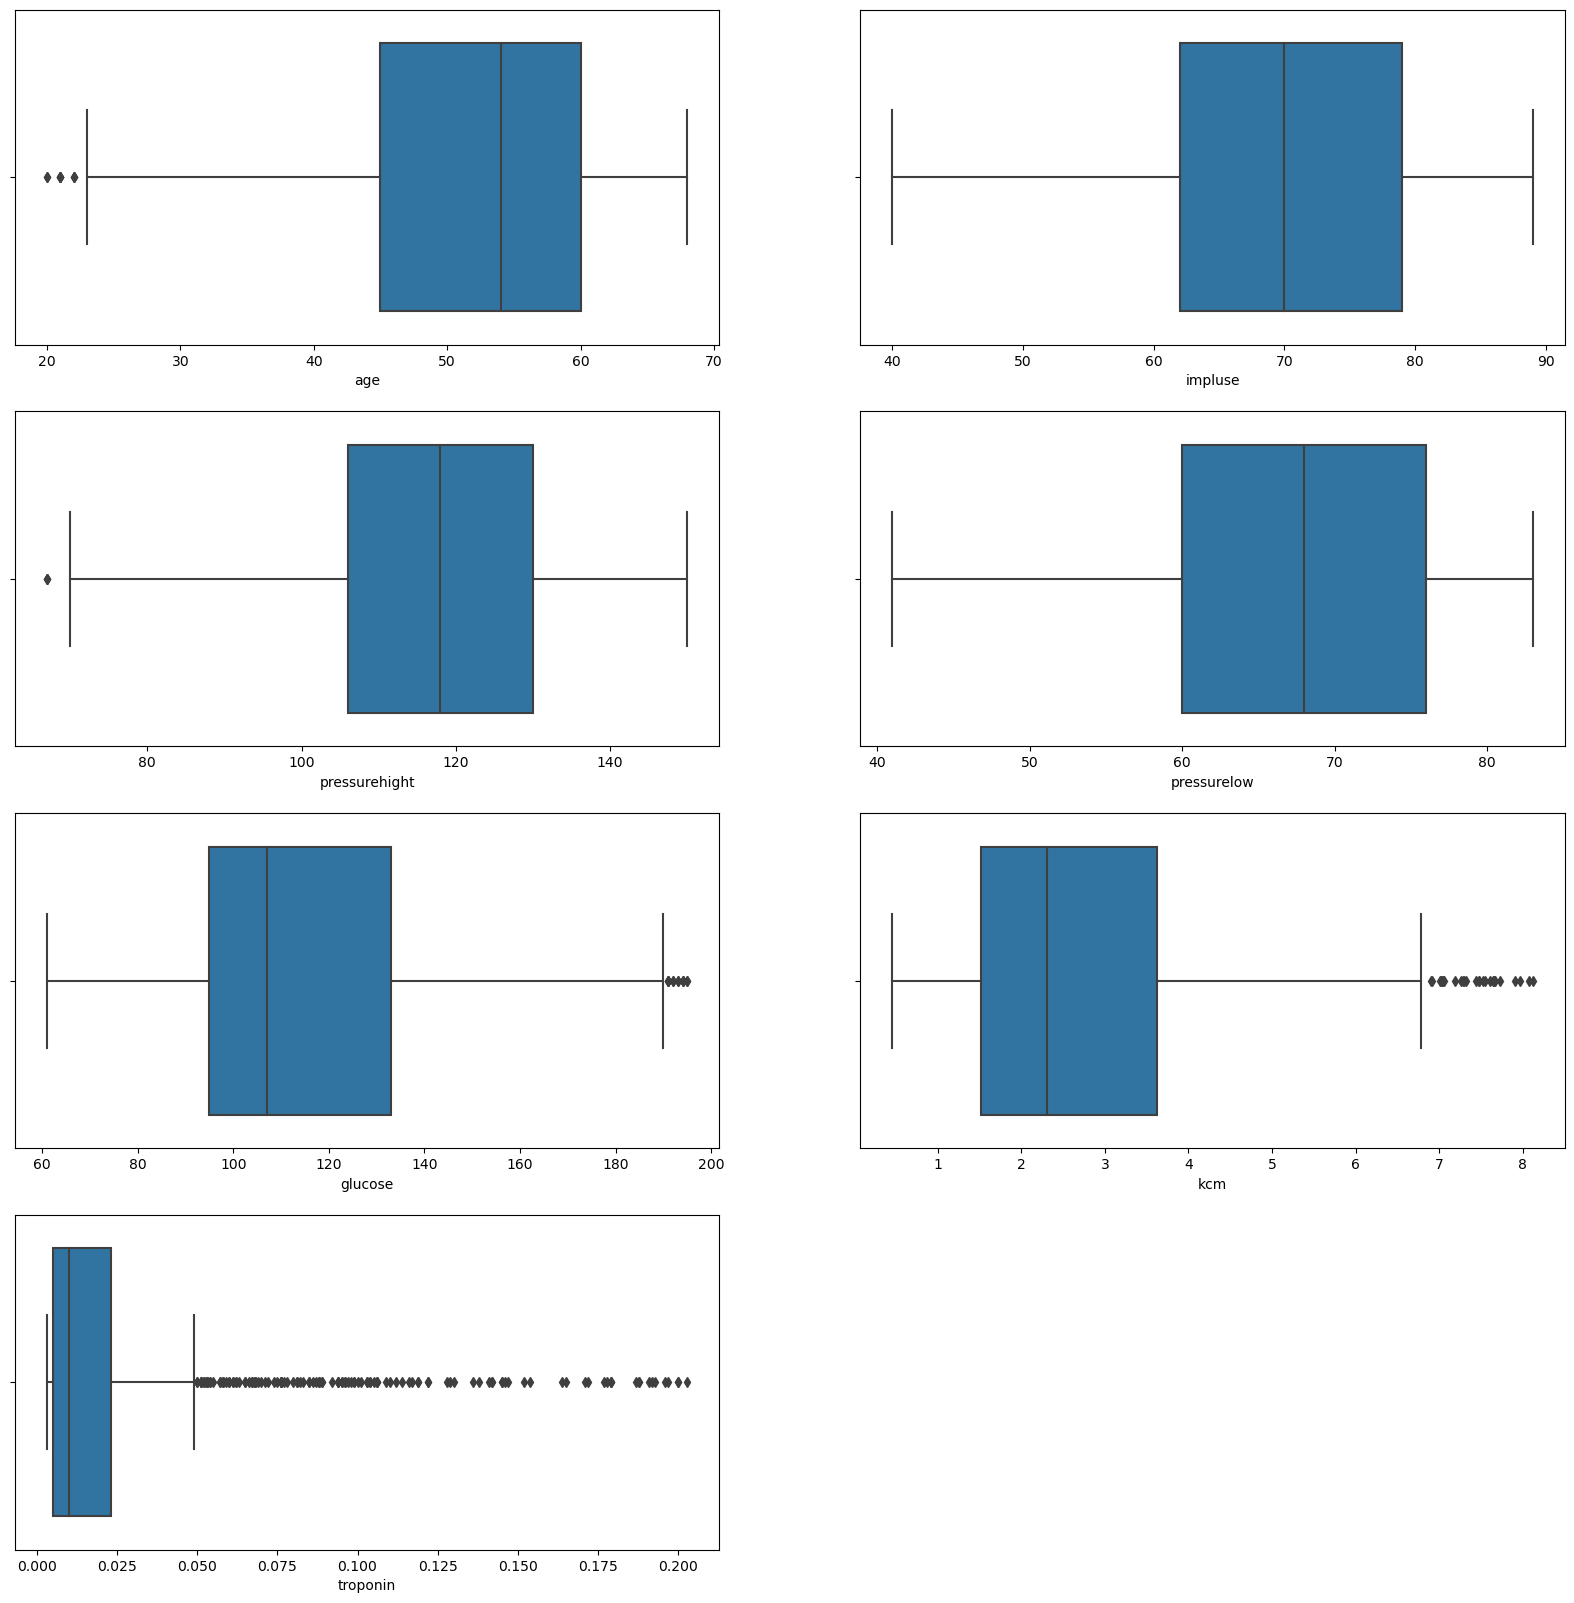

In [73]:
#PLOTTING BOXPLOT TO CHECK OUTLIERS IN THE DATAFRAME

out_lier = ['age','impluse','pressurehight','pressurelow','glucose','kcm','troponin']




plt.figure(figsize=(20,20))
for i , var in enumerate(out_lier):
    plt.subplot(4,2,i+1)
    sns.boxplot(df1[var])
    

TRIMMING METHOD HAS BEEN USED BUT WE CAN SEE THAT NEARLY 20% OF THE ROWS IS LOST AND ALSO OUTLIERS COULD NOT GET HANDLED EFFECTIVELY(STILL MANY OUTLIERS CAN BE SEEN IN THE BOXPLOT).

THEREFORE WE WILL USE CAPPING.

In [22]:
#CAPPING - changing the outliers to upper and lower limits


out_lier = ['age','impluse','pressurehight','pressurelow','glucose','kcm','troponin']

def cap_out_lier(var,upper_limit,lower_limit):
    df[var]=np.where(
    df[var]>upper_limit,
    upper_limit,
    np.where(
    df[var]<lower_limit,
    lower_limit,
    df[var]))
    


    
cap_out_lier("age",  92.0,20.0)
cap_out_lier("impluse", 116.5, 32.5)
cap_out_lier("pressurehight", 192.5, 60.5)
cap_out_lier("pressurelow" ,109.5, 33.5 )
cap_out_lier("glucose",  276.75,-9.25)
cap_out_lier("kcm",12.030000000000001,-4.57)
cap_out_lier("troponin",   0.20475,-0.11324999999999998)

C:\Users\Ritika Kumari\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Ritika Kumari\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Ritika Kumari\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\User

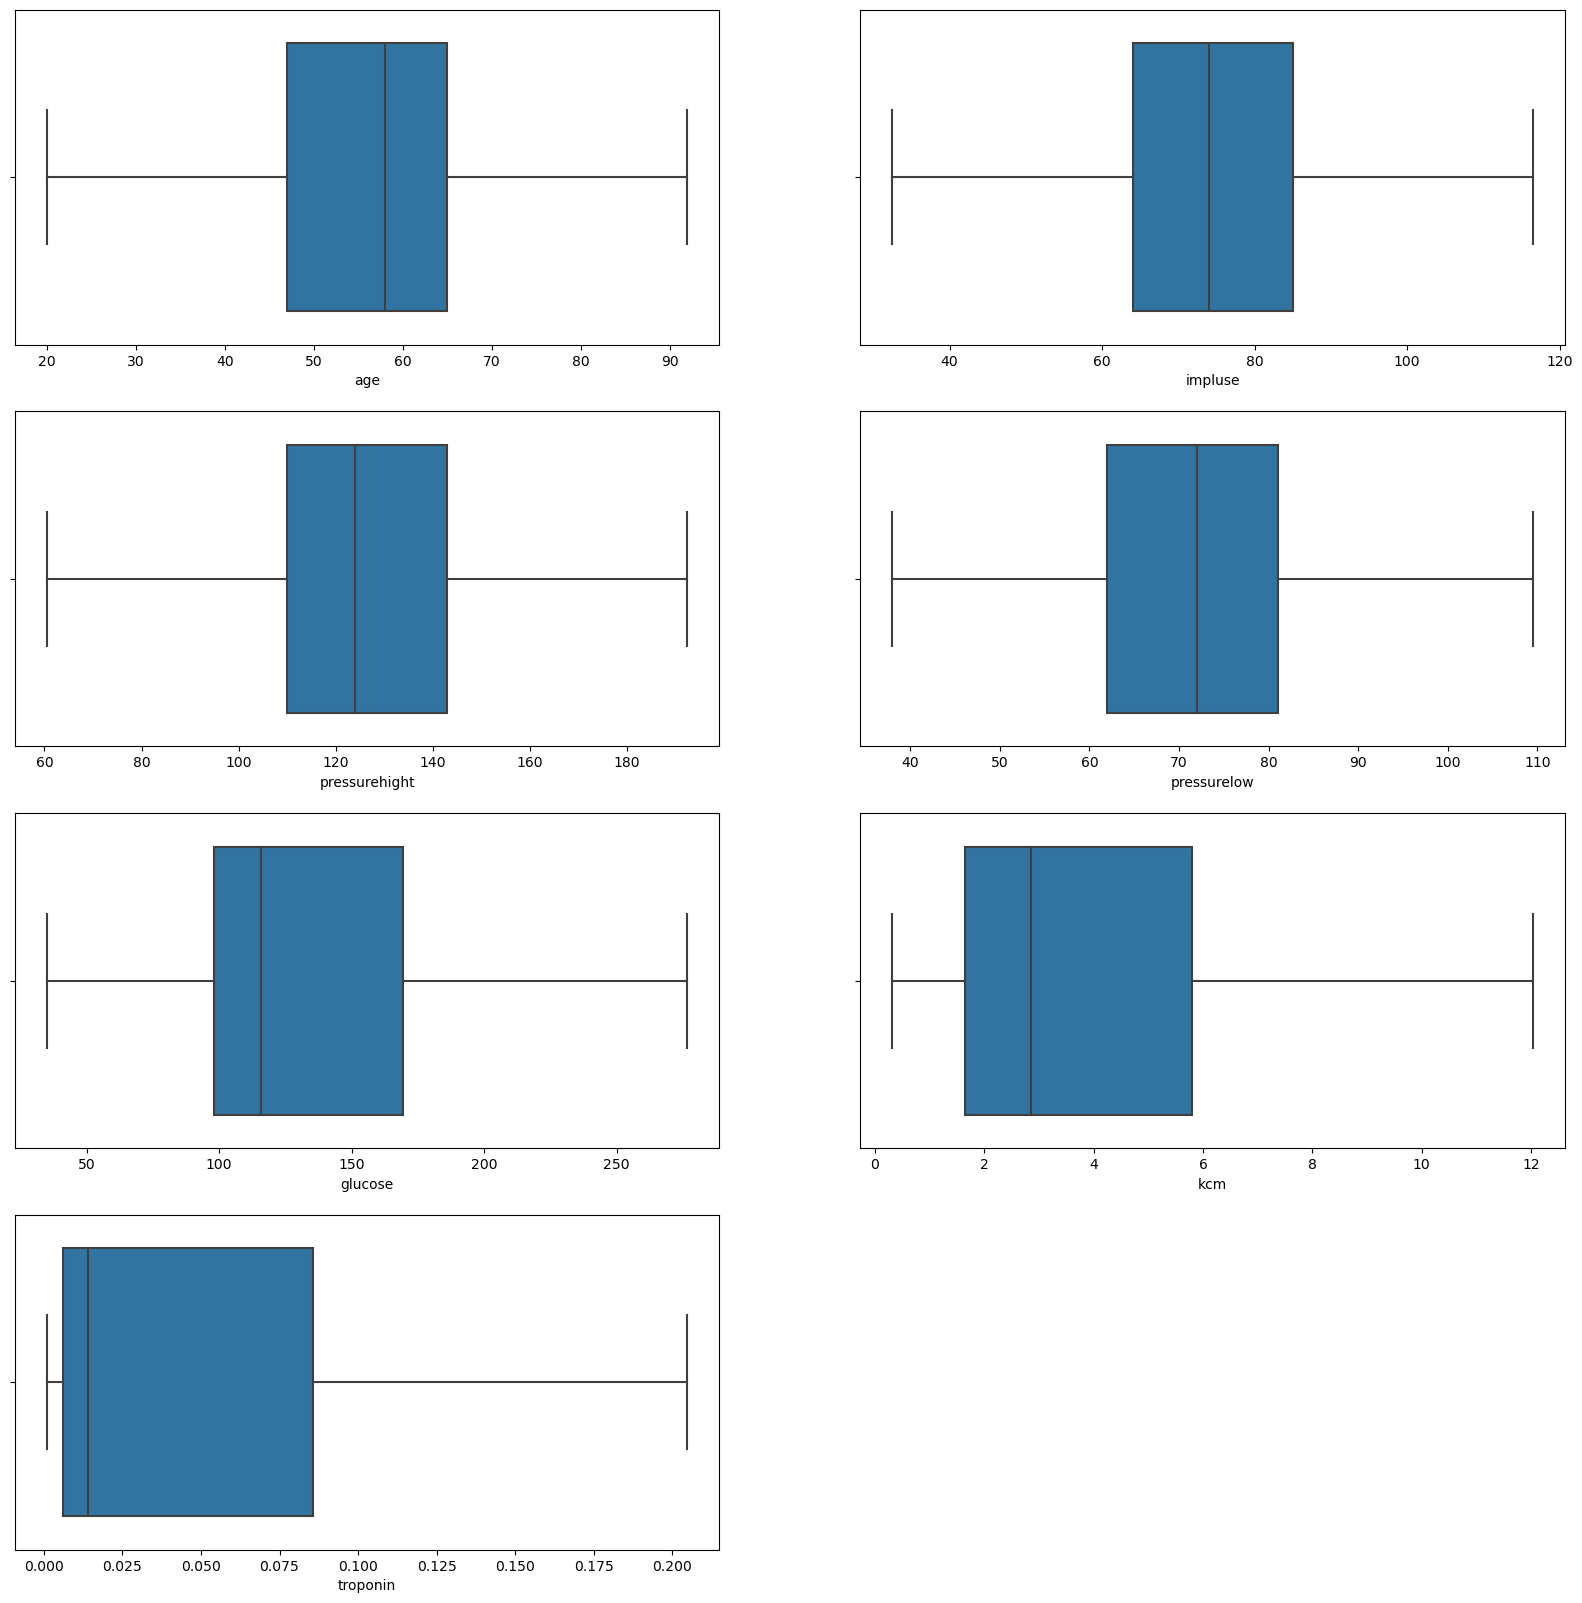

In [23]:
#PLOTTING BOXPLOT TO CHECK OUTLIERS IN THE DATAFRAME

out_lier = ['age','impluse','pressurehight','pressurelow','glucose','kcm','troponin']




plt.figure(figsize=(20,20))
for i , var in enumerate(out_lier):
    plt.subplot(4,2,i+1)
    sns.boxplot(df[var])
    

WE  HAVE  SUCCESSFULLY  HANDLED  THE  OUTLIERS!!

# ENCODING (CATEGORICAL FEATURE -->  NUMERICAL FEATURE)

In [24]:
#LISTING OUT THE CATEGORICAL FEATURES

cat_var = df.select_dtypes(include=['O']).keys()
cat_var

Index(['class'], dtype='object')

In [25]:
#ONE HOT ENCODING
#GETTING THE DUMMY VARIABLES

new_df = pd.get_dummies(df,prefix = 'attack')
new_df.head()

,age,gender,impluse,pressurehight,pressurelow,glucose,kcm,troponin,attack_negative,attack_positive
0,20.0,1,32.5,60.5,38.0,35.0,0.321,0.001,1,0
1,20.0,1,32.5,65.0,40.0,50.0,0.345,0.002,0,1
2,20.0,1,36.0,65.0,40.0,50.0,0.353,0.002,1,0
3,20.0,1,40.0,65.0,40.0,60.0,0.452,0.002,0,1
4,20.0,1,40.0,67.0,41.0,61.0,0.457,0.003,1,0


In [26]:
#GETTING (K-1) DUMMY VARIABLES

new_df = pd.get_dummies(df,prefix = 'attack',drop_first = True)
new_df.head()

,age,gender,impluse,pressurehight,pressurelow,glucose,kcm,troponin,attack_positive
0,20.0,1,32.5,60.5,38.0,35.0,0.321,0.001,0
1,20.0,1,32.5,65.0,40.0,50.0,0.345,0.002,1
2,20.0,1,36.0,65.0,40.0,50.0,0.353,0.002,0
3,20.0,1,40.0,65.0,40.0,60.0,0.452,0.002,1
4,20.0,1,40.0,67.0,41.0,61.0,0.457,0.003,0


OUR TARGET FEATURE IS : attack_positive

In [27]:
#CHECKING THE DATATYPE OF THE DATAFRAME

new_df.dtypes

age                float64
gender               int64
impluse            float64
pressurehight      float64
pressurelow        float64
glucose            float64
kcm                float64
troponin           float64
attack_positive      uint8
dtype: object

WE HAVE SUCCESSFULLY ENCODED THE  "class" FEATURE!!

# FEATURE SELECTION

In [28]:
#GETTING THE CORRELATION MATRIX

new_df.corr()

,age,gender,impluse,pressurehight,pressurelow,glucose,kcm,troponin,attack_positive
age,1.000000,-0.014286,0.964042,0.978034,0.987094,0.886365,0.854613,0.778534,0.036139
gender,-0.014286,1.000000,-0.017255,-0.017869,-0.013708,-0.017121,-0.024670,-0.029766,0.094432
impluse,0.964042,-0.017255,1.000000,0.994062,0.991181,0.956919,0.920836,0.862199,0.033013
pressurehight,0.978034,-0.017869,0.994062,1.000000,0.995566,0.952714,0.918453,0.858754,0.031234
pressurelow,0.987094,-0.013708,0.991181,0.995566,1.000000,0.937269,0.902696,0.831387,0.033080
glucose,0.886365,-0.017121,0.956919,0.952714,0.937269,1.000000,0.982483,0.950389,0.021148
kcm,0.854613,-0.024670,0.920836,0.918453,0.902696,0.982483,1.000000,0.976176,0.013657
troponin,0.778534,-0.029766,0.862199,0.858754,0.831387,0.950389,0.976176,1.000000,0.009094
attack_positive,0.036139,0.094432,0.033013,0.031234,0.033080,0.021148,0.013657,0.009094,1.000000


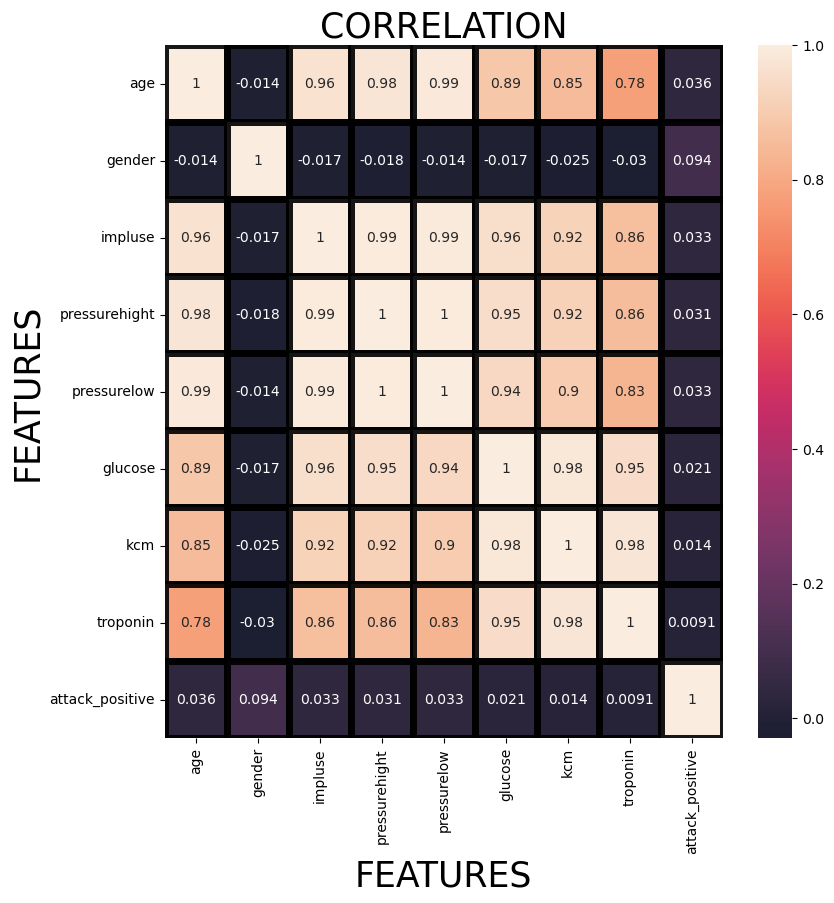

In [29]:
#FEATURE SELECTION USING HEATMAP
#PLOTTING THE HEATMAP

plt.figure(figsize=(9,9))
sns.heatmap(new_df.corr(),annot = True,linewidth = 5,linecolor='k',alpha=0.9,cbar_kws={"shrink":1})
plt.title("CORRELATION",fontsize = 25,color='k')
plt.xlabel("FEATURES",fontsize = 25,color = 'k')
plt.ylabel("FEATURES",fontsize = 25,color = 'k')
plt.show()


ON ANALYSING THE HEATMAP,WE CONCLUDE THAT THE RELATION BETWEEN FEATURE "troponin" AND THE TARGET FEATURE "attack_positive" IS VERY WEAK(CORRELATION COEFFICIENT : 0.0091)

# SPLITTING THE DATASET

In [30]:
#SPLITTING INTO X MATRIX AND y VECTOR
#DROPPING THE "troponin" FEATURE

X = new_df.drop(columns=['attack_positive','troponin'],axis=1)
y = new_df['attack_positive']

In [31]:
#PRINTING THE SHAPE OF (X-MATRIX) AND (y-VECTOR)

print("shape of X :",X.shape )
print("shape of y :",y.shape )

shape of X : (1319, 7)
shape of y : (1319,)


In [32]:
#SPLITTING  THE DATA IN TRAIN AND TEST

X_train , X_test , y_train , y_test = train_test_split(X , y , test_size=0.3 , random_state=52)

print('shape of X_train : ', X_train.shape)
print('shape of X_test : ', X_test.shape)
print('shape of y_train : ', y_train.shape)
print('shape of y_test : ', y_test.shape)

shape of X_train :  (923, 7)
shape of X_test :  (396, 7)
shape of y_train :  (923,)
shape of y_test :  (396,)


In [33]:
#GETING THE HEAD OF X_TRAIN

X_train.head()

,age,gender,impluse,pressurehight,pressurelow,glucose,kcm
518,53.0,1,70.0,118.0,68.0,106.00,2.25
849,62.0,1,81.0,134.0,77.0,141.00,4.11
1292,82.0,1,116.5,192.5,104.0,276.75,12.03
472,52.0,1,68.0,116.0,67.0,104.00,2.11
366,49.0,0,64.0,111.0,63.0,99.00,1.76


THE DATASET IS NOW SPLITTED

# FEATURE SCALING

In [34]:
#CREATING OBJECT

sc = StandardScaler()

In [35]:
#FITTING

sc.fit(X_train)

StandardScaler()

In [36]:
#CHECKING THE MEAN VALUE

sc.mean_

array([ 56.63488624,   0.66630553,  76.43282774, 127.70043337,
        72.65113759, 143.11180932,   4.57059263])

In [37]:
#CHECKING THE STANDARD DEVIATION

sc.scale_

array([13.4322245 ,  0.47153205, 14.86936015, 25.0626716 , 13.74552685,
       60.20455854,  3.87071754])

In [38]:
#GETTING THE DESCRIPTION OF THE TRAIN DATASET

X_train.describe().T

,count,mean,std,min,25%,50%,75%,max
age,923.0,56.634886,13.439507,20.000,48.00,58.0,66.00,92.00
gender,923.0,0.666306,0.471788,0.000,0.00,1.0,1.00,1.00
impluse,923.0,76.432828,14.877422,32.500,64.00,75.0,85.50,116.50
pressurehight,923.0,127.700433,25.076259,65.000,110.00,125.0,144.00,192.50
pressurelow,923.0,72.651138,13.752979,40.000,62.00,72.0,81.00,109.50
glucose,923.0,143.111809,60.237199,50.000,98.00,117.0,176.00,276.75
kcm,923.0,4.570593,3.872816,0.345,1.69,2.9,6.11,12.03


In [39]:
#TRANSFORMING THE DATASETS

X_train_sc = sc.transform(X_train)
X_test_sc = sc.transform(X_test)

In [40]:
#CALLING THE ARRAY

X_train_sc

array([[-0.2706094 ,  0.70768143, -0.43262304, ..., -0.33837463,
        -0.61642856, -0.59952518],
       [ 0.39942109,  0.70768143,  0.30715325, ...,  0.31638383,
        -0.03507723, -0.11899412],
       [ 1.88837774,  0.70768143,  2.69461307, ...,  2.28065921,
         2.21973541,  1.92713813],
       ...,
       [-1.31287906,  0.70768143, -1.10514693, ..., -1.28413685,
        -0.88218917, -0.87337622],
       [ 0.25052543,  0.70768143,  0.17264847, ...,  0.17088195,
        -0.20117761, -0.28692164],
       [ 0.69721242, -1.4130652 ,  0.71066758, ...,  0.68013853,
         0.62932428,  0.46229345]])

In [41]:
#CONVERTING THE ARRAY INTO DATAFRAME

X_train_sc = pd.DataFrame(X_train_sc,columns = ['age','gender','impluse','pressurehight','pressurelow','glucose','kcm'])
X_test_sc = pd.DataFrame(X_test_sc,columns = ['age','gender','impluse','pressurehight','pressurelow','glucose','kcm'])

In [42]:
#GETTING TOP 5 VALUES

X_train_sc.head()

,age,gender,impluse,pressurehight,pressurelow,glucose,kcm
0,-0.270609,0.707681,-0.432623,-0.387047,-0.338375,-0.616429,-0.599525
1,0.399421,0.707681,0.307153,0.251353,0.316384,-0.035077,-0.118994
2,1.888378,0.707681,2.694613,2.585501,2.280659,2.219735,1.927138
3,-0.345057,0.707681,-0.567128,-0.466847,-0.411126,-0.649649,-0.635694
4,-0.568401,-1.413065,-0.836137,-0.666347,-0.702129,-0.732699,-0.726117


In [43]:
#CHECKING THE DISTRIBUTION OF THE DATAFRAME

X_train_sc.describe().T

,count,mean,std,min,25%,50%,75%,max
age,923.0,-2.394858e-16,1.000542,-2.727388,-0.642849,0.101630,0.697212,2.632856
gender,923.0,-1.739309e-16,1.000542,-1.413065,-1.413065,0.707681,0.707681,0.707681
impluse,923.0,6.747943e-17,1.000542,-2.954588,-0.836137,-0.096361,0.609789,2.694613
pressurehight,923.0,3.680696e-17,1.000542,-2.501746,-0.706247,-0.107747,0.650352,2.585501
pressurelow,923.0,1.555275e-16,1.000542,-2.375401,-0.774880,-0.047371,0.607388,2.680789
glucose,923.0,-4.316999e-16,1.000542,-1.546591,-0.749309,-0.433718,0.546274,2.219735
kcm,923.0,-9.989602e-17,1.000542,-1.091682,-0.744201,-0.431598,0.397706,1.927138


In [44]:
#REDUCING THE VALUES UPTO 2 DECIMAL COUNTS

X_train_sc.describe().round(2)

,age,gender,impluse,pressurehight,pressurelow,glucose,kcm
count,923.00,923.00,923.00,923.00,923.00,923.00,923.00
mean,-0.00,-0.00,0.00,0.00,0.00,-0.00,-0.00
std,1.00,1.00,1.00,1.00,1.00,1.00,1.00
min,-2.73,-1.41,-2.95,-2.50,-2.38,-1.55,-1.09
25%,-0.64,-1.41,-0.84,-0.71,-0.77,-0.75,-0.74
50%,0.10,0.71,-0.10,-0.11,-0.05,-0.43,-0.43
75%,0.70,0.71,0.61,0.65,0.61,0.55,0.40
max,2.63,0.71,2.69,2.59,2.68,2.22,1.93


WE HAVE SUCCESSFULLY RESCALED THE FEATURES WHERE "MEAN" IS 0 AND "STANDARD DEVIATION" IS 1!!

# MODEL TRAINING

In [45]:
sns.scatterplot(new_df,hue='attack_positive')

C:\Users\Ritika Kumari\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


ValueError: Could not interpret value `attack_positive` for parameter `hue`

In [ ]:
svc = SVC(kernel='rbf')
svc.fit(X_train_sc , y_train)
print(svc.score(X_test , y_test))

dt = DecisionTreeClassifier()
dt.fit(X_train_sc , y_train)

rf=RandomForestClassifier()
rf.fit(X_train_sc , y_train)

knn = KNeighborsClassifier(n_neighbors = 5)
knn.fit(X_train_sc , y_train)

m= MultinomialNB()
m.fit(X_train_sc , y_train)

g=GaussianNB()
g.fit(X_train_sc , y_train)

b=BernoulliNB()
b.fit(X_train_sc , y_train)


In [ ]:
print(svc.score(X_test_sc , y_test))
csv_svm = cross_val_score(svc,X_train,y_train,cv=10)
print(csv_svm.mean())

print(dt.score(X_test , y_test))
csv_dt = cross_val_score(dt,X_train,y_train,cv=10)
print(csv_dt.mean())


print(rf.score(X_test , y_test))
csv_rf = cross_val_score(rf,X_train,y_train,cv=10)
print(csv_rf.mean())

print(knn.score(X_test , y_test))
csv_knn = cross_val_score(knn,X_train,y_train,cv=10)
print(csv_knn.mean())

print(g.score(X_test , y_test))
csv_g = cross_val_score(g,X_train,y_train,cv=10)
print(csv_g.mean())

print(b.score(X_test , y_test))
csv_b = cross_val_score(b,X_train,y_train,cv=10)
print(csv_b.mean())



In [ ]:
svc = SVC(kernel='linear')
svc.fit(X_train_sc , y_train)
print(svc.score(X_test_sc , y_test))

In [ ]:
dt = DecisionTreeClassifier(criterion='entropy')
dt.fit(X_train_sc , y_train)
dt.score(X_test , y_test)

In [ ]:
rf=RandomForestClassifier(n_estimators=10,criterion='gini')
rf.fit(X_train_sc , y_train)

In [ ]:
print(rf.score(X_test , y_test))


In [ ]:
knn = KNeighborsClassifier(n_neighbors = 100)
knn.fit(X_train_sc, y_train)

In [ ]:
knn.score(X_test,y_test)

In [ ]:
g=GaussianNB()
g.fit(X_train_sc , y_train)

In [ ]:
g.score(X_test_sc,y_test)

In [ ]:
m= MultinomialNB()
m.fit(X_train, y_train)
m.score(X_test_sc,y_test)


In [ ]:
b=BernoulliNB()
b.fit(X_train , y_train)
m.score(X_test,y_test)

In [ ]:
#logistic regression

In [ ]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()

In [ ]:
from sklearn.model_selection import GridSearchCV
parameter = {"penalty":['l1', 'l2', 'elasticnet', 'none'],'C':[1,2,3,4,5,6,10,20,30,40,50],'max_iter':[100,200,300]}

In [ ]:
classifier_regressor = GridSearchCV(classifier , param_grid =parameter,scoring = 'accuracy',cv = 5)

In [ ]:
classifier_regressor.fit(X_train_sc, y_train)

In [ ]:
#GETTING THE BEST COMBINATION OF VALUES

print(classifier_regressor.best_params_)

In [ ]:
print(classifier_regressor.best_score_)